## STANDARDIZE

scaling, minimize gap, show outlier

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = {
    "TB" : [0.8, 0.85, 0.92, 0.88, 0.82, 0.86, 0.87, 0.93, 0.81, 1],
    "BB" : [20, 25, 21, 29, 30, 21, 28, 27, 29, 30]
}
df = pd.DataFrame(data)
df

,TB,BB
0,0.80,20
1,0.85,25
2,0.92,21
3,0.88,29
4,0.82,30
5,0.86,21
6,0.87,28
7,0.93,27
8,0.81,29
9,1.00,30


__Read from MS XL__

In [16]:
dfXL = pd.read_excel("DataBBTB.xlsx", skiprows=6, header=1)
dfXL = dfXL[["TB (m)", "BB (kg)"]].iloc[:10]
dfXL

,TB (m),BB (kg)
0,0.8,20
1,0.85,25
2,0.92,21
3,0.88,29
4,0.82,30
5,0.86,21
6,0.87,28
7,0.93,27
8,0.81,29
9,1,30


<hr>

## Standarisasi Formula

Standarisasi $\displaystyle z_{score} = \frac {x - \bar{x} } {s} $,
dengan standar deviasi $\displaystyle s = \sqrt {\frac {\sum (x - \bar {x}) ^ 2 } {n - ddof}}$

- High outlier jika $ z_{score} > 2.5 $
- Low outlier jika $ z_{score} < -2.5 $
- Data terstandarisasi jika
$\bar{z}$ ~ 0 dan $d_{z}$ ~ 1 

__Count s with pandas__

In [17]:
dfXL["TB (m)"].std()

0.06186005711819757

In [18]:
dfXL["BB (kg)"].std()

3.972125095937662

__Count s with numpy/sklearn__

In [20]:
np.std(dfXL["TB (m)"])

0.05868560300448484

In [21]:
np.std(dfXL["BB (kg)"])

3.7682887362833544

_nilainya berbeda, karena defaultnya ddof (delta degree of freedom) nya adalah 0 </br>
padahal untuk standar deviasi sampel, ddofnya adalah 1_

In [22]:
np.std(dfXL["TB (m)"], ddof = 1)

0.06186005711819757

In [23]:
np.std(dfXL["BB (kg)"], ddof = 1)

3.972125095937662

<hr>

__Standarisasi Z score with Pandas__

In [26]:
dfXL["Z TB pd"] = (dfXL["TB (m)"] - dfXL["TB (m)"].mean())/ dfXL["TB (m)"].std()
dfXL["Z BB pd"] = (dfXL["BB (kg)"] - dfXL["BB (kg)"].mean())/ dfXL["BB (kg)"].std()
dfXL

,TB (m),BB (kg),Z TB pd,Z BB pd
0,0.8,20,-1.19625,-1.51053
1,0.85,25,-0.387972,-0.251754
2,0.92,21,0.743614,-1.25877
3,0.88,29,0.0969931,0.755263
4,0.82,30,-0.872938,1.00702
5,0.86,21,-0.226317,-1.25877
6,0.87,28,-0.0646621,0.503509
7,0.93,27,0.905269,0.251754
8,0.81,29,-1.03459,0.755263
9,1,30,2.03686,1.00702


__Standarisasi Z score with Numpy__

In [27]:
dfXL["Z TB np"] = (dfXL["TB (m)"] - dfXL["TB (m)"].mean())/ np.std(dfXL["TB (m)"])
dfXL["Z BB np"] = (dfXL["BB (kg)"] - dfXL["BB (kg)"].mean())/ np.std(dfXL["BB (kg)"])
dfXL

,TB (m),BB (kg),Z TB pd,Z BB pd,Z TB np,Z BB np
0,0.8,20,-1.19625,-1.51053,-1.26096,-1.59223
1,0.85,25,-0.387972,-0.251754,-0.408959,-0.265372
2,0.92,21,0.743614,-1.25877,0.783838,-1.32686
3,0.88,29,0.0969931,0.755263,0.10224,0.796117
4,0.82,30,-0.872938,1.00702,-0.920158,1.06149
5,0.86,21,-0.226317,-1.25877,-0.238559,-1.32686
6,0.87,28,-0.0646621,0.503509,-0.0681598,0.530745
7,0.93,27,0.905269,0.251754,0.954237,0.265372
8,0.81,29,-1.03459,0.755263,-1.09056,0.796117
9,1,30,2.03686,1.00702,2.14703,1.06149


__Cek Standarisasi >> mean & std__

In [31]:
print(dfXL["Z TB pd"].mean())
print(dfXL["Z BB pd"].mean())
print(dfXL["Z TB np"].mean())
print(dfXL["Z BB np"].mean())

print(dfXL["Z TB pd"].std())
print(dfXL["Z BB pd"].std())
print(dfXL["Z TB np"].std())
print(dfXL["Z BB np"].std())

1.7763568394002506e-16
-8.881784197001253e-17
1.3322676295501878e-16
0.0
1.0000000000000002
1.0
1.0540925533894598
1.0540925533894598


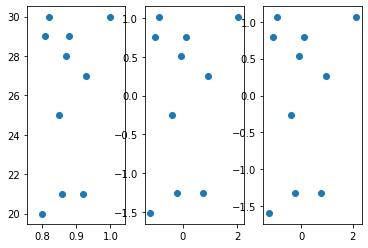

In [32]:
plt.subplot(131)
plt.scatter(dfXL["TB (m)"], dfXL["BB (kg)"])
plt.subplot(132)
plt.scatter(dfXL["Z TB pd"], dfXL["Z BB pd"])
plt.subplot(133)
plt.scatter(dfXL["Z TB np"], dfXL["Z BB np"])
plt.show()

____

### Standarisasi dengan Sklearn

#### import package

In [54]:
from sklearn.preprocessing import StandardScaler

####  fit transform

In [59]:
scalertb = StandardScaler()
y = scalertb.fit_transform(dfXL[["TB (m)"]])
y

array([[-1.26095663],
       [-0.40895891],
       [ 0.7838379 ],
       [ 0.10223973],
       [-0.92015754],
       [-0.23855936],
       [-0.06815982],
       [ 0.95423745],
       [-1.09055708],
       [ 2.14703426]])

In [60]:
scalerbb = StandardScaler()
z = scalerbb.fit_transform(dfXL[["BB (kg)"]])
z

array([[-1.59223468],
       [-0.26537245],
       [-1.32686223],
       [ 0.79611734],
       [ 1.06148978],
       [-1.32686223],
       [ 0.53074489],
       [ 0.26537245],
       [ 0.79611734],
       [ 1.06148978]])

In [61]:
dfXL["Z TB skl"] = y
dfXL["Z BB skl"] = z
dfXL

,TB (m),BB (kg),Z TB pd,Z BB pd,Z TB np,Z BB np,Z TB skl,Z BB skl
0,0.8,20,-1.19625,-1.51053,-1.26096,-1.59223,-1.260957,-1.592235
1,0.85,25,-0.387972,-0.251754,-0.408959,-0.265372,-0.408959,-0.265372
2,0.92,21,0.743614,-1.25877,0.783838,-1.32686,0.783838,-1.326862
3,0.88,29,0.0969931,0.755263,0.10224,0.796117,0.102240,0.796117
4,0.82,30,-0.872938,1.00702,-0.920158,1.06149,-0.920158,1.061490
5,0.86,21,-0.226317,-1.25877,-0.238559,-1.32686,-0.238559,-1.326862
6,0.87,28,-0.0646621,0.503509,-0.0681598,0.530745,-0.068160,0.530745
7,0.93,27,0.905269,0.251754,0.954237,0.265372,0.954237,0.265372
8,0.81,29,-1.03459,0.755263,-1.09056,0.796117,-1.090557,0.796117
9,1,30,2.03686,1.00702,2.14703,1.06149,2.147034,1.061490


#### inverse transform

In [66]:
invTB = scalertb.inverse_transform(dfXL[["Z TB skl"]])
invBB = scalerbb.inverse_transform(dfXL[["Z BB skl"]])

print (invTB)
print (invBB)

[[0.8 ]
 [0.85]
 [0.92]
 [0.88]
 [0.82]
 [0.86]
 [0.87]
 [0.93]
 [0.81]
 [1.  ]]
[[20.]
 [25.]
 [21.]
 [29.]
 [30.]
 [21.]
 [28.]
 [27.]
 [29.]
 [30.]]


#### without parsing

In [69]:
scaler = StandardScaler()
scaler.fit(dfXL[["TB (m)" ,"BB (kg)"]])
zz = scaler.transform(dfXL[["TB (m)", "BB (kg)"]])
zz

array([[-1.26095663, -1.59223468],
       [-0.40895891, -0.26537245],
       [ 0.7838379 , -1.32686223],
       [ 0.10223973,  0.79611734],
       [-0.92015754,  1.06148978],
       [-0.23855936, -1.32686223],
       [-0.06815982,  0.53074489],
       [ 0.95423745,  0.26537245],
       [-1.09055708,  0.79611734],
       [ 2.14703426,  1.06148978]])

In [70]:
zzTB = zz[:,0]
zzTB

array([-1.26095663, -0.40895891,  0.7838379 ,  0.10223973, -0.92015754,
       -0.23855936, -0.06815982,  0.95423745, -1.09055708,  2.14703426])

In [71]:
zzBB = zz[:,1]
zzBB

array([-1.59223468, -0.26537245, -1.32686223,  0.79611734,  1.06148978,
       -1.32686223,  0.53074489,  0.26537245,  0.79611734,  1.06148978])

In [72]:
dfXL["Z TB skl2"] = zzTB
dfXL["Z BB skl2"] = zzBB
dfXL

,TB (m),BB (kg),Z TB pd,Z BB pd,Z TB np,Z BB np,Z TB skl,Z BB skl,Z TB skl2,Z BB skl2
0,0.8,20,-1.19625,-1.51053,-1.26096,-1.59223,-1.260957,-1.592235,-1.260957,-1.592235
1,0.85,25,-0.387972,-0.251754,-0.408959,-0.265372,-0.408959,-0.265372,-0.408959,-0.265372
2,0.92,21,0.743614,-1.25877,0.783838,-1.32686,0.783838,-1.326862,0.783838,-1.326862
3,0.88,29,0.0969931,0.755263,0.10224,0.796117,0.102240,0.796117,0.102240,0.796117
4,0.82,30,-0.872938,1.00702,-0.920158,1.06149,-0.920158,1.061490,-0.920158,1.061490
5,0.86,21,-0.226317,-1.25877,-0.238559,-1.32686,-0.238559,-1.326862,-0.238559,-1.326862
6,0.87,28,-0.0646621,0.503509,-0.0681598,0.530745,-0.068160,0.530745,-0.068160,0.530745
7,0.93,27,0.905269,0.251754,0.954237,0.265372,0.954237,0.265372,0.954237,0.265372
8,0.81,29,-1.03459,0.755263,-1.09056,0.796117,-1.090557,0.796117,-1.090557,0.796117
9,1,30,2.03686,1.00702,2.14703,1.06149,2.147034,1.061490,2.147034,1.061490


In [73]:
inv = scalertb.inverse_transform(dfXL[["Z TB skl2", "Z BB skl2"]])
inv

array([[0.8       , 0.78055875],
       [0.85      , 0.85842646],
       [0.92      , 0.79613229],
       [0.88      , 0.92072063],
       [0.82      , 0.93629417],
       [0.86      , 0.79613229],
       [0.87      , 0.90514708],
       [0.93      , 0.88957354],
       [0.81      , 0.92072063],
       [1.        , 0.93629417]])